# Numerical bifurcation diagrams and bistable systems

Let us study the following system from [Gardner et al. (2000, Nature)](https://www.nature.com/articles/35002131):

\begin{equation}
\begin{cases}
\frac{du}{dt} = \frac{\alpha}{1+v^\beta} - u\\
\frac{dv}{dt} = \frac{\alpha}{1+u^\beta} - v
\end{cases}
\end{equation}

In [1]:
from functools import partial 
from collections import defaultdict 
import numpy as np # Numerical computing library
import matplotlib.pyplot as plt # Plotting library
import scipy.integrate #Integration library
from mpl_toolkits.mplot3d import axes3d #Used for the 3d bifurcation plot
import matplotlib.patches as mpatches #used to write custom legends
%matplotlib inline

## Trajectories 

A Cauchy problem under the form:

\begin{equation}
\begin{cases}
\frac{dy}{dt} = f(y,t)\\
y(0) = y_0
\end{cases}
\end{equation}

can be numerically solved on the interval $[0,T]$ with `scipy.integrate.odeint(f, y0, time)`. 

In [2]:
# Exercise: 
# - Simulate this system using scipy.integrate.odeint
# - Draw the trajectories using matplotlib.pyplot.plot

# We will look at those set of parameters
scenarios = [{'alpha':1, 'beta':2}, 
             {'alpha':1, 'beta':10}]

# On this timespan
time = np.linspace(0, 20, 1000)

# Here is a list of interesting initial conditions:
initial_conditions = [(.1,1), (2,2),(1,1.3),(2,3),(2,1),(1,2)]

In [3]:
def cellular_switch(y, t, alpha, beta):
    """ Flow of Gardner's bistable cellular switch
    Args:
        y (array): (concentration of u, concentration of v)
        t (float): time (not used, autonomous system)
        alpha (float): maximum rate of repressor synthesis 
        beta (float): degree of cooperative behavior.
    Return: dy/dt
    """

In [4]:
def cellular_switch(y,t,alpha, beta):
    """ ODE system modeling Gardner's bistable cellular switch
    Args:
        y (array): (concentration of u, concentration of v)
        t (float): Time
        alpha (float): maximum rate of repressor synthesis 
        beta (float): degree of cooperative behavior.
    Return: dy/dt
    """
    u, v = y # you can use y[0], y[1] instead. 
    return np.array([(alpha/(1+v**beta)) - u ,
                     (alpha/(1+u**beta)) - v])

In [5]:
# Do the simulations.
# Remember that we define f as the partial application of cellular_switch. 
trajectory = {}
for i,param in enumerate(scenarios):
    for j,ic in enumerate(initial_conditions):
        trajectory[i,j] = scipy.integrate.odeint(partial(cellular_switch, **param),
                                                 y0=ic,
                                                 t=time)

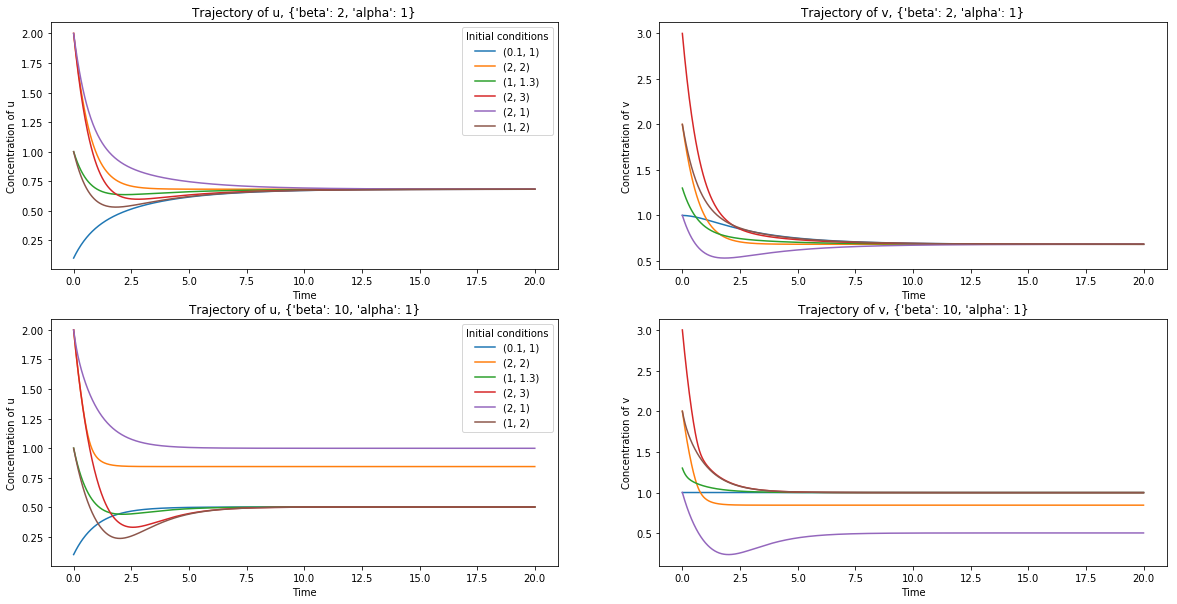

In [6]:
# Draw the trajectories. 
fig, ax = plt.subplots(2,2,figsize=(20,10))
for i,param in enumerate(scenarios):
    for j,ic in enumerate(initial_conditions):
        ax[i][0].set(xlabel='Time', ylabel='Concentration of u', title='Trajectory of u, {}'.format(param))
        ax[i][1].set(xlabel='Time', ylabel='Concentration of v', title='Trajectory of v, {}'.format(param))
        l = ax[i][0].plot(time,trajectory[i,j][:,0], label=ic)
        ax[i][1].plot(time,trajectory[i,j][:,1], color=l[0].get_color())
    ax[i][0].legend(title='Initial conditions')

## Phase diagram

### Isoclines

Null isoclines are the manifolds on which one component of the flow is null. 
Find the equation of the null-isoclines for $u$ and $v$. 


To find the null-isoclines, you have to solve:

\begin{equation}
\frac{du}{dt} = 0 \Leftrightarrow u = \frac{\alpha}{1 + v^\beta}
\end{equation}

For the first one and:

\begin{equation}
\frac{dv}{dt} = 0 \Leftrightarrow v = \frac{\alpha}{1 + u^\beta}
\end{equation}

For the second one. 

In [7]:
#Exercise: 
#Plot the isoclines using matplotlib.pyplot.plot in the (u,v) plane. 

uspace = np.linspace(0,2,100)
vspace = np.linspace(0,2,100)

In [8]:
def plot_isocline(ax, uspace, vspace, alpha, beta, color='k', style='--', opacity=.5):
    """Plot the isoclines of the symmetric cellular switch system"""
    ax.plot(uspace, alpha/(1+uspace**beta), style, color=color, alpha=opacity)
    ax.plot(alpha/(1+vspace**beta),vspace, style, color=color, alpha=opacity)
    ax.set(xlabel='u',ylabel='v')

### Flow

The flow is a vector field of the state space that encode the local behavior of the system. 


In [9]:
# Exercise: Draw the flow using matplotlib.pyplot.streamplot

In [10]:
def plot_flow(ax, param, uspace, vspace):
    """Plot the flow of the symmetric cellular switch system"""
    X,Y = np.meshgrid(uspace,vspace)
    a = cellular_switch([X,Y],0,**param)   
    ax.streamplot(X,Y,a[0,:,:], a[1,:,:], color=(0,0,0,.1))
    ax.set(xlim=(uspace.min(),uspace.max()), ylim=(vspace.min(),vspace.max()))

### Equilibrium points 

The equilibrium points are the root of the flow, and the intersection of two null isoclines.

In [11]:
# Exercice: Find the equation satisfied by the equilibrium points
 
# Write a function to solve an equation in the form f(x)=0
# Use scipy.optimize.fsolve, check the convergence of the numerical method 
# (use the option full_output=1 of fsolve) and return nan otherwise.  
# Use the endpoint of the trajectories as the starting points of fsolve. 

If the system is: 

\begin{equation}
\begin{cases}
\frac{du}{dt} = F(u,v)\\
\frac{du}{dt} = G(u,v)
\end{cases}
\end{equation}

We look for points where F(u,v)=G(u,v)=0

\begin{equation}
\frac{\alpha}{1+u^\beta} - \left(\frac{\alpha}{u}-1 \right)^\frac{1}{\beta} = 0
\end{equation}

In [12]:
def findroot(func, init):
    """ Find root of equation function(x)=0
    Args:
        - the system (function),
        - the initial values (type list or np.array)

    return: correct equilibrium (type np.array) 
            if the numerical method converge or return nan
    """
    pass

def find_unique_equilibria(flow, starting_points):
    '''Return the list of unique equilibria of a flow 
    starting around starting_points'''
    pass

In [13]:
# Correct code (not shown to students)
def findroot(func, init): 
    """ Find root of equation function(x)=0
    Args:
        - the system (function),
        - the initial values (type list or np.array)

    return: correct equilibrium (type np.array) 
            if the numerical method converge or return nan
    """
    sol, info, convergence, sms = scipy.optimize.fsolve(func, init, full_output=1)
    if convergence == 1:
        return sol
    return np.array([np.nan]*len(init))

In [14]:
def find_unique_equilibria(flow, starting_points):
    '''Return the list of unique equilibria of a flow 
    starting around starting_points'''
    equilibria = [] 
    roots = [findroot(flow, init) 
             for init in starting_points]
    # Only keep unique equilibria 
    for r in roots:
        if (not any(np.isnan(r)) and
            not any([all(np.isclose(r, x)) for x in equilibria])):
            equilibria.append(r)
    return equilibria

equilibria = {}
for i, param in enumerate(scenarios):
    
    # Find the position of the equilibirum around the endpoint of each trajectory. 
    flow = partial(cellular_switch,t=0, **param)
    starting_points = [trajectory[i,j][-1,:] for j 
                       in range(len(initial_conditions))] 
    equilibria[i] = find_unique_equilibria(flow, starting_points)
    print('{} Equilibrium point(s) for parameters: {}'.format(len(equilibria[i]), param))

1 Equilibrium point(s) for parameters: {'beta': 2, 'alpha': 1}
3 Equilibrium point(s) for parameters: {'beta': 10, 'alpha': 1}


## Nature of the equilbirum points

The local nature and stability of the equilibrium is given by linearising the flow function. This is done using the Jacobian matrix of the flow:

\begin{equation}
\begin{bmatrix}
    F(u+h,v+k)\\G(u+h,v+k)
\end{bmatrix} =  
\begin{bmatrix}
    F(u,v)\\G(u,v)
\end{bmatrix} +
\begin{bmatrix}
    \frac{ \partial F(u,v)}{\partial u} &  \frac{ \partial F(u,v)}{\partial v}\\
    \frac{ \partial G(u,v)}{\partial u} &  \frac{ \partial G(u,v)}{\partial v}\\
\end{bmatrix}
\begin{bmatrix}
    h\\k
\end{bmatrix} + o \left( \left| \left| \begin{bmatrix}
    h\\k
\end{bmatrix} \right | \right | \right )
\end{equation}


In [15]:
# Exercise: 
#- Find the expression of the jacobian of the flow
#- Write a function to evaluate it
#- Find the stability of each equilibrium point using scipy.linalg.eigv
#- (*) Find the nature of each equilibrium point using scipy.linalg.eigv

In [16]:
def jacobian_cellular_switch(u,v, alpha, beta):
    """ Jacobian matrix of the ODE system modeling Gardner's bistable cellular switch
    Args:
        u (float): concentration of u, 
        v (float): concentration of v,
        alpha (float): maximum rate of repressor synthesis, 
        beta (float): degree of cooperative behavior.
    Return: np.array 2x2"""
    pass

def stability(jacobian):
    """ Stability of the equilibrium given its associated 2x2 jacobian matrix. 
    Args:
        jacobian (np.array 2x2): the jacobian matrix at the equilibrium point.
    Return:
        (string) status of equilibrium point.
    """
    pass 

\begin{equation}
J \big \rvert_{u,v} = 
\begin{bmatrix}
    \frac{ \partial F(u,v)}{\partial u} &  \frac{ \partial F(u,v)}{\partial v}\\
    \frac{ \partial G(u,v)}{\partial u} &  \frac{ \partial G(u,v)}{\partial v}\\
\end{bmatrix} = - \begin{bmatrix}
    1 &  \frac{ \alpha \beta  v^{\beta-1}}{(1+v^\beta)^2}\\
    \frac{ \alpha \beta   u^{\beta-1}}{(1+u^\beta)^2}  &  1\\
\end{bmatrix}
\end{equation}

In [17]:
def jacobian_cellular_switch(u,v, alpha, beta):
    """ Jacobian matrix of the ODE system modeling Gardner's bistable cellular switch
    Args:
        u (float): concentration of u, 
        v (float): concentration of v,
        alpha (float): maximum rate of repressor synthesis, 
        beta (float): degree of cooperative behavior.
    Return: np.array 2x2"""
    return - np.array([[1, alpha*beta*v**(beta-1) / (1+v**beta)**2  ],
                       [alpha*beta*u**(beta-1) / (1+u**beta)**2, 1]])

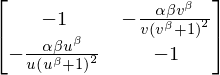

In [18]:
# Alternatively you can use Sympy (Symbolic python) to compute the derivative:
import sympy 
sympy.init_printing()

# Define variable as symbols for sympy
u, v = sympy.symbols("u, v")
alpha, beta = sympy.symbols("alpha, beta")

# Symbolic expression of the system
dudt = alpha/(1 + v**beta) - u
dvdt = alpha/(1 + u**beta) - v

# Symbolic expression of the matrix
sys = sympy.Matrix([dudt, dvdt])
var = sympy.Matrix([u, v])
jac = sys.jacobian(var)

# You can convert jac to a function:
jacobian_cellular_switch = sympy.lambdify((u, v, alpha, beta), jac, dummify=False)

jac

In [19]:
def stability(jacobian):
    """ Stability of the equilibrium given its associated 2x2 jacobian matrix. 
    Args:
        jacobian (np.array 2x2): the jacobian matrix at the equilibrium point.
    Return:
        (string) status of equilibrium point 
    """
    determinant = np.linalg.det(jacobian)
    trace = np.matrix.trace(jacobian)
    if np.isclose(trace,0) and np.isclose(determinant,0):
        nature = "Center (Hopf)"
    elif np.isclose(determinant,0):
        nature = "Transcritical (Saddle-Node)"
    elif determinant < 0:
        nature = "Saddle"
    else:
        nature = "Stable" if trace < 0 else "Unstable"
        nature += " focus" if (trace**2 - 4 * determinant) < 0 else " node"
    return nature

In [20]:
# Find the nature of the equilibria
equilibria_nature = {}
for i, param in enumerate(scenarios):
    print('\nParameters: {}'.format(param))
    equilibria_nature[i] = []
    for (u,v) in equilibria[i]:
        equilibria_nature[i].append(stability(jacobian_cellular_switch(u,v, **param)))
        print("{} in ({} {})".format( equilibria_nature[i][-1], u,v,))


Parameters: {'beta': 2, 'alpha': 1}
Stable node in (0.6823278038280193 0.6823278038280194)

Parameters: {'beta': 10, 'alpha': 1}
Stable node in (0.5025684136901962 0.9989731530559247)
Saddle in (0.844397528792023 0.844397528792023)
Stable node in (0.9989731530559247 0.5025684136901961)


In [21]:
# This is an utility function you can use to make your own graph prettier. 
EQUILIBRIUM_COLOR = {'Stable node':'C0',
                    'Unstable node':'C1', 
                    'Saddle':'C4',
                    'Stable focus':'C3',
                    'Unstable focus':'C2',
                    'Center (Hopf)':'C5',
                    'Transcritical (Saddle-Node)':'C6'}
def plot_equilibrium(ax, position, nature, legend=True):
    """Draw equilibrium points at position with the color 
       corresponding to their nature"""
    for pos, nat in zip(position,nature):
        ax.scatter(pos[0],pos[1],
                   color= (EQUILIBRIUM_COLOR[nat] 
                           if nat in EQUILIBRIUM_COLOR
                           else 'k'),
                   zorder=100)
        
    if legend:
        # Draw a legend for the equilibrium types that were used.
        labels = list(frozenset(nature))
        ax.legend([mpatches.Patch(color=EQUILIBRIUM_COLOR[n]) for n in labels], labels)

### Complete phase diagram

In [22]:
# Exercise: Draw on a single graph in the state space:
# - The isoclines of u and v
# - The flow 
# - The position and nature of the equilibrium points
# - The trajectories you simulated.

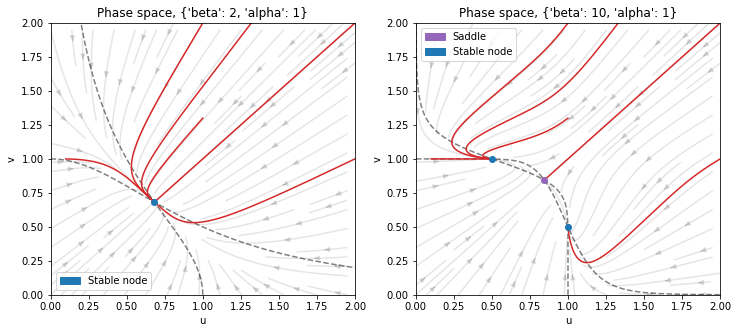

In [23]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
for i, param in enumerate(scenarios):
    ax[i].set(xlabel='u', ylabel='v', title="Phase space, {}".format(param))
    plot_flow(ax[i], param, uspace=uspace, vspace=vspace)
    plot_isocline(ax[i], uspace=uspace, vspace=vspace, **param)
    for j in range(len(initial_conditions)):
        ax[i].plot(trajectory[i,j][:,0],trajectory[i,j][:,1], color='C3')
    plot_equilibrium(ax[i], equilibria[i], equilibria_nature[i])

## Bifurcation diagram

The bifurcation diagram show the position and nature of equilibria as a function of a control parameter. In order to simplify the problem we will only plot the value of $u$ in the following.

A very naïve way of building the bifurcation diagram might be to do the procedure above for all values of beta. 


### Numerical continuation 

However, this is *not* practical for most models. We do not want to integrate the systems for all values of parameters. 

The more general problem is to solve a system of non linear equations $F(u; \lambda) = 0$ for all values of the parameter $\lambda$, knowing that the solutions are continuous with respect to $\lambda$. 

Solving by numerical approximations can be done using **Numerical continuation** methods. Here we present the simplest method called [Natural Parameter continuation](https://en.wikipedia.org/wiki/Numerical_continuation#Natural_parameter_continuation). 

In [24]:
# Exercise:
# Use Natural parameter continuation to draw the bifurcation diagram. 

# As starting points for the equilibria use the one computed for the phase
# diagram. 
# Do the continuation on: 
beta_space = np.linspace(10,0.5,1000)
starting_points = [(.5, .99), (0.84, .84), (.99, .5)]

In [25]:
def numerical_continuation(f, initial_u, lbda_values):
    """ Find the roots of the parametrised non linear equation.  
    
    Iteratively find approximate solutions of `F(u, lambda) = 0` 
    for several values of lambda. The solution of the step i is
    used as initial guess for the numerical solver at step i+1. 
    The first inital guess is initial_u (for lbda_values[0]).        
    
    Args:
        f (function): Function of u and lambda.
        initial_u (float): Starting point for the contiunation.
        lbda_values (array): Values of the parameter lambda (in the order of the continuation process).
    
    Return: 
        (numpy.array) output[i] is the solutions of f(u,lbda_values[i]) = 0
         NaN if the algorithm did not converge.
    """


In [26]:
def numerical_continuation(f, initial_u, lbda_values):
    """ Find the roots of the parametrised non linear equation.  
    
    Iteratively find approximate solutions of `F(u, lambda) = 0` 
    for several values of lambda. The solution of the step i is
    used as initial guess for the numerical solver at step i+1. 
    The first inital guess is initial_u (for lbda_values[0]).        
    
    Args:
        f (function): Function of u and lambda.
        initial_u (float): Starting point for the contiunation.
        lbda_values (array): Values of the parameter lambda (in the order of the continuation process).
    
    Return: 
        (numpy.array) output[i] is the solutions of f(u,lbda_values[i]) = 0
         NaN if the algorithm did not converge.
    """
    eq = []
    for lbda in lbda_values:
        eq.append(findroot(lambda x: f(x,lbda),
                           eq[-1] if eq else initial_u))
    return eq

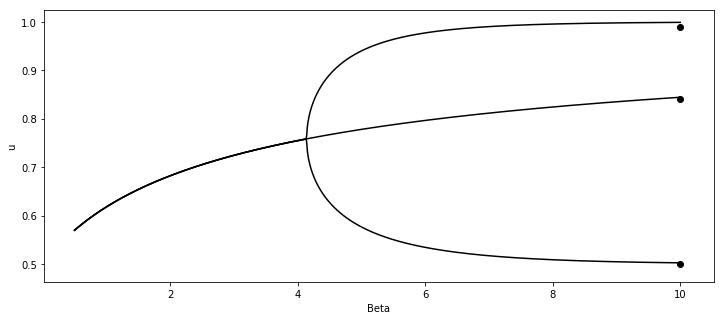

In [27]:
def func(u, lbda):
    return cellular_switch(u, t=0, alpha=1., beta=lbda)

fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.set(xlabel='Beta', ylabel='u')
for init in starting_points:
    
    # Plot the starting points
    dots = plt.scatter(beta_space[0],init[0], color='k')
    
    # Perform numerical continuation. 
    eq = numerical_continuation(func, np.array(init), beta_space)
    plt.plot(beta_space, [x[1] for x in eq], color='k')

In [28]:
# You can use theses for a fancy plotting. 
def get_segments(values):
    """Return a dict listing the interval where values is constant.
    Return:
        A dict mapping (start, finish) index to value"""
    start = 0
    segments = {}
    for i,val in enumerate(values[1:],1):
        if val != values[start] or i == len(values)-1:
            segments[(start,i)] = values[start]
            start = i
    return segments

def plot_bifurcation(ax, branches, lbdaspace):
    """Function to draw nice bifurcation graph
    Args:
        ax: object of the plt.subplots
        branches: a list of two lists giving the position and
        the nature of the equilibrium.
        lbda_space: bifurcation parameter space
    """
    labels = frozenset()
    for eq, nature in branches:
        labels = labels.union(frozenset(nature))
        segments = get_segments(nature)
        for idx, n in segments.items():
            ax.plot(lbdaspace[idx[0]:idx[1]],eq[idx[0]:idx[1]],
                     color=EQUILIBRIUM_COLOR[n] if n in EQUILIBRIUM_COLOR else 'k')
    ax.legend([mpatches.Patch(color=EQUILIBRIUM_COLOR[n]) for n in labels],
              labels)

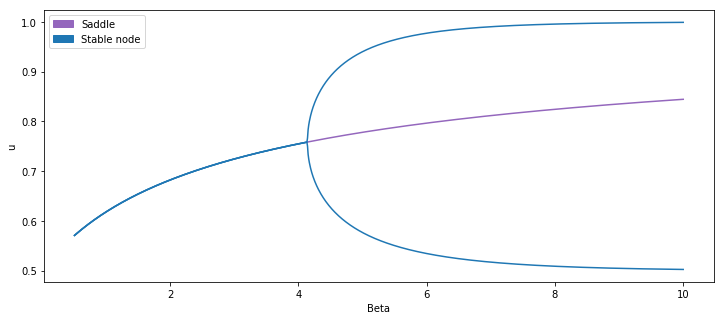

In [29]:
# A fancier version: 
def get_branches(func, starting_points, lbda_space, jac):
    branches = []
    for init in starting_points:
        # Perform numerical continuation. 
        eq = numerical_continuation(func, np.array(init), lbda_space)
        nature = [stability(jac(u, lbda))
                  for (u, lbda) in zip(eq,lbda_space)]
        branches.append((np.array([x[0] for x in eq]),
                         nature))
    return branches

def func(u, lbda):
    return cellular_switch(u, t=0, alpha=1., beta=lbda)
def jac(u, lbda):
    return jacobian_cellular_switch(u[0], u[1], alpha=1., beta=lbda)

branches = get_branches(func, starting_points, beta_space, jac)

fig, ax = plt.subplots(1,1,figsize=(12,5))
plot_bifurcation(ax, branches, beta_space)
ax.set(xlabel='Beta', ylabel='u');

## Assymetrical System

We introduce a second control parameter: now the non linearity of the inhibition is controled by $\beta_1, \beta_2$. Thus breaking the symmetry of the system as in [Ozbudak et al. 2004](https://www.nature.com/articles/nature02298): 

\begin{equation}
\begin{cases}
\frac{du}{dt} = \frac{\alpha}{1+v^{\beta_1}} - u\\
\frac{dv}{dt} = \frac{\alpha}{1+u^{\beta_2}} - v
\end{cases}
\end{equation}

In [30]:
def asymmetrical_cellular_switch(y,t,alpha, beta1, beta2):
    """Flow of the asymmetrical cellular switch model.
    Args: 
        y: (concentration of u, concentration of v)
        t: time (unused, this system is autonomous)
        alpha: maximum production of u or v
        beta1: non-linearity parameter of the effect v->u
        beta2: non-linearity parameter of the effect u->v
    Return: (np.array) [du/dt, dv/dt]
    """
    u, v = y 
    return np.array([(alpha/(1+v**beta1)) - u ,
                     (alpha/(1+u**beta2)) - v])
def jacobian_asymmetrical_cellular_switch(u,v, alpha, beta1, beta2):
    """Jacobian of the assymetrical cellular switch model.
    Args: 
        u: concentration of u
        v: concentration of v
        alpha: maximum production of u or v
        beta1: non-linearity parameter of the effect v->u
        beta2: non-linearity parameter of the effect u->v
    Return: (np.array) 2x2 Jacobian matrix. 
    """
    return - np.array([[1, alpha*beta1*v**(beta1-1) / (1+v**beta1)**2],
                       [alpha*beta2*u**(beta2-1) / (1+u**beta2)**2, 1]])

### Single parameter bifurcation 

In [31]:
# Exercise:
# We fix one of the two asymmetry parameters. Draw the phase space diagram
# for several values of the other. What do you observe ? 
# Draw the bifurcation diagram. What is the name of the bifurcation ? 
beta2 = 6.0
alpha = 1.0

# For the state space diagram you can plot the following
beta1_space = np.linspace(4, 7, 4)

# For the bifurcation diagram you can use natural parameter continuation and:
beta1_bdiag_space = np.linspace(7,0.5,1000)
starting_points = [(0.5,1), (1,0.5), (0.75,0.75)]

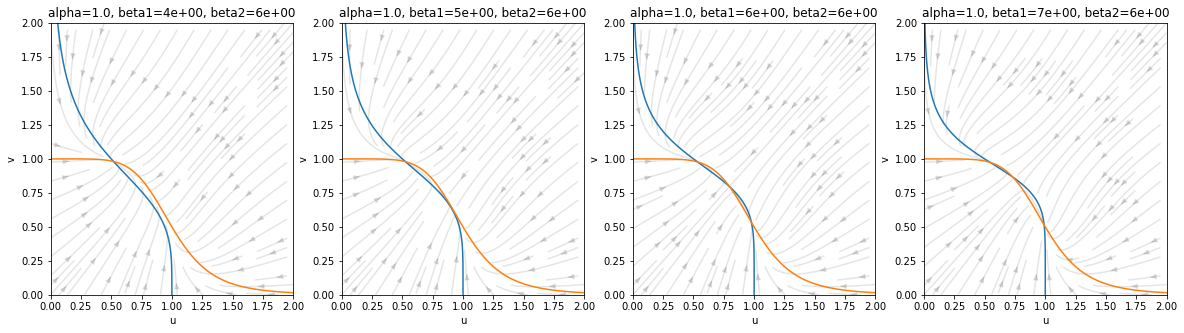

In [32]:
fig, axes = plt.subplots(1,4,figsize=(20,5))
for ax,beta1 in zip(axes,beta1_space):
    ax.plot(alpha/(1+vspace**beta1),vspace)
    ax.plot(uspace, alpha/(1+uspace**beta2))
    X,Y = np.meshgrid(uspace,vspace)
    a = asymmetrical_cellular_switch([X,Y],t=0,alpha=alpha,beta1=beta1,beta2=beta2)   
    ax.streamplot(X,Y,a[0,:,:], a[1,:,:], color=(0,0,0,.1))
    ax.set(xlabel='u', ylabel='v', xlim=(0,2), ylim=(0,2),
                title='alpha={}, beta1={:3.1}, beta2={:3.1}'.format(alpha,beta1,beta2))

/home/guilhem/.local/lib/python3.5/site-packages/numpy/linalg/linalg.py:2022: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


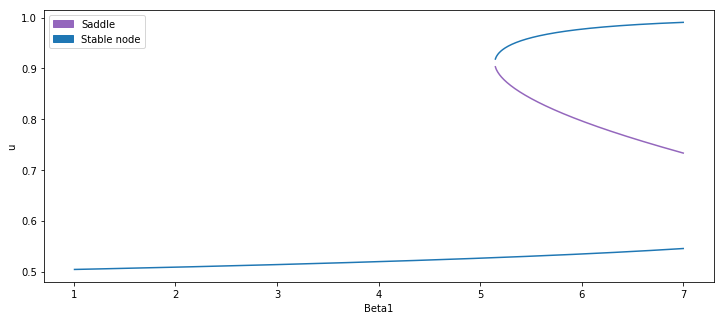

In [33]:
def func_asymmetric(u, lbda):
    return asymmetrical_cellular_switch(u, t=0, alpha=1., beta1=lbda, beta2=beta2)
def jac_asymmetric(u, lbda):
    return jacobian_asymmetrical_cellular_switch(u[0], u[1], alpha=1., beta1=lbda, beta2=beta2)

beta1_bdiag_space = np.linspace(7,1,1000)
branches = get_branches(func_asymmetric,starting_points,beta1_bdiag_space,jac_asymmetric)

fig, ax = plt.subplots(1,1,figsize=(12,5))
plot_bifurcation(ax, branches, beta1_bdiag_space)
ax.set(xlabel='Beta1', ylabel='u');

This is a **Saddle node (or fold) bifurcation.** (and a branch) Breaking the symmetry perturbed the pitchfork bifurcation we saw earlier. The pitchfork bifurcation is thus *structurally unstable*, small changes in the model change its nature. 

In fact, if you do the continuation on the right, you will see that there are two saddle-node bifurcations:

/home/guilhem/.local/lib/python3.5/site-packages/numpy/linalg/linalg.py:2022: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


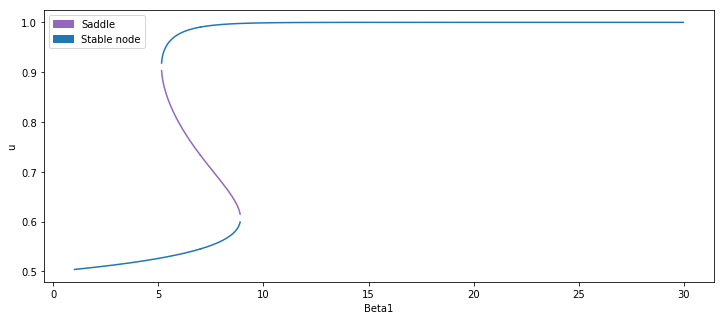

In [34]:
beta1_bdiag_space_left = np.linspace(7,1,1000)
beta1_bdiag_space_right = np.linspace(7,30,1000)

branches_left = get_branches(func_asymmetric,starting_points,beta1_bdiag_space_left,jac_asymmetric)
branches_right = get_branches(func_asymmetric,starting_points,beta1_bdiag_space_right,jac_asymmetric)

fig, ax = plt.subplots(1,1,figsize=(12,5))
plot_bifurcation(ax, branches_left, beta1_bdiag_space_left)
plot_bifurcation(ax, branches_right, beta1_bdiag_space_right)

ax.set(xlabel='Beta1', ylabel='u');

### The Cusp bifurcation: a bifurcation of codimension 2

We are now ready to draw the bifurcation diagram with respect to both assymetry parameters. 

In [35]:
# Plot whether the system is monostable or bistable in the 2d parameter space (beta1,beta2)
b_space = np.linspace(0, 13, 250)[1:]

In [36]:
equilibria_manifold = defaultdict(lambda:[])

for i, beta1 in enumerate(b_space):
    
    # Find the starting points based on the beta1 = beta2 case.
    derivative = partial(asymmetrical_cellular_switch, alpha=1., beta1=beta1, beta2=beta1)
    final_points = []
    for j,ic in enumerate(initial_conditions):
        t = scipy.integrate.odeint(derivative, 
                                   y0=ic, 
                                   t=np.linspace(0,1000,1000))
        final_points.append(t[-1,:])
    starting_points = find_unique_equilibria(partial(derivative,t=0),
                                            final_points)
    
    # For each starting point, do the numerical 
    # continuation on the right as well as on the left.
    func = lambda u, lbda: asymmetrical_cellular_switch(u,  t=0, alpha=1., beta1=beta1, beta2=lbda)  
    
    for continuation_on in [b_space[i:],b_space[:i+1][::-1]]:
        for init in starting_points:
            eq = numerical_continuation(func, init, 
                                        continuation_on)
            for beta2, pos in zip(continuation_on,eq):
                if not any(np.isnan(pos)):
                    equilibria_manifold[beta1,beta2].append(pos)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


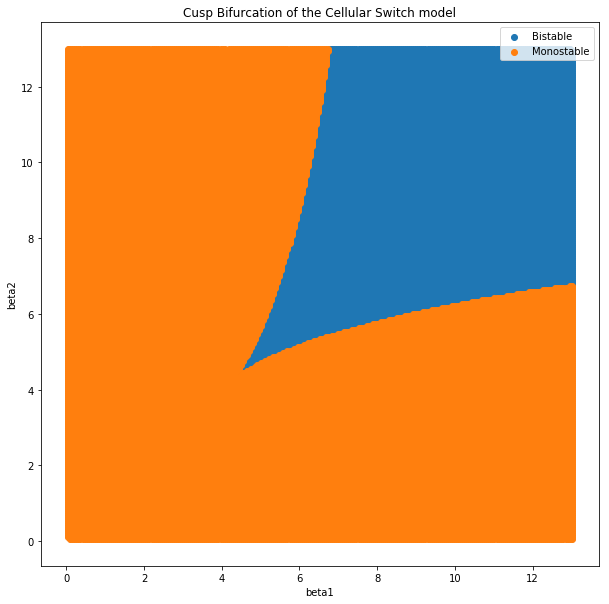

In [37]:
bistable = []
monostable = []
for (beta1,beta2),eq in equilibria_manifold.items():
    if len(eq) == 3:
        bistable.append((beta1,beta2))
    if len(eq) == 1:
        monostable.append((beta1,beta2))
        
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.scatter(*zip(*bistable), label='Bistable')
ax.scatter(*zip(*monostable), label='Monostable')
ax.legend()
ax.set(xlabel='beta1',ylabel='beta2', title='Cusp Bifurcation of the Cellular Switch model');

The two saddle node bifurcation collide in a pitchfork bifurcation. This is called a Cusp bifrucation. 

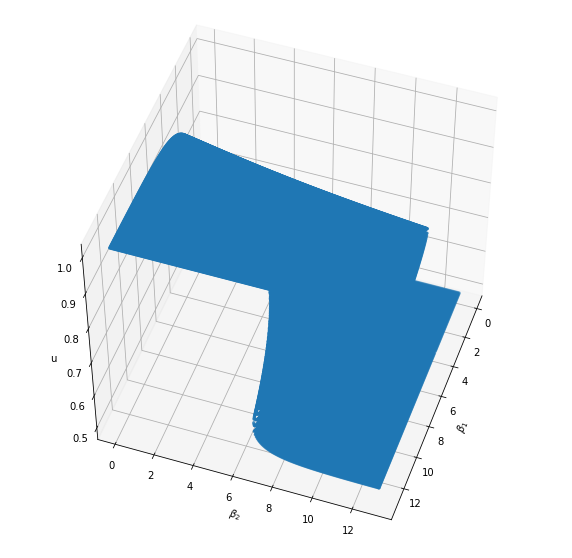

In [39]:
# Surface of the equilibria 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

x,y,z,nb,xx,yy= [],[],[],[],[],[]
for k,v in equilibria_manifold.items():
    x += [k[0]]*len(v)
    y += [k[1]]*len(v)
    z += [u[0] for u in v]
    if len(v) == 1 or len(v) ==3:
        xx.append(k[0])
        yy.append(k[1])
        nb.append('C0 'if len(v)== 1 else 'C1')

ax.scatter(x, y, z, c='C0', marker='.')
ax.view_init(azim=19,elev=50)
ax.set(xlabel=r'$\beta_1$',ylabel=r'$\beta_2$',zlabel='u')

# Save the surface in a xyz file for 3d printing.
# (I then open it with Meshlab to create a mesh (Reconstruct normal+poisson surface reconstruction)
# then with blender to thicken it (solidify) before printing it). 
import pandas as pd 
df = pd.DataFrame({'x':x,'y':y,'z':z})
df['z']*=10
df.to_csv("~/cusp.xyz", index=False, header=None, sep=' ')